<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_Python/blob/main/Colab_Notebook/02_07_07_09_survival_analysis_coxnnet_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)


# 7.9 Cox-nnet: A Neural Network Extension of Cox Proportional Hazards Model Tutorial

This tutorial provides a comprehensive guide to implementing and using Cox-nnet, a neural network-based extension of the Cox proportional hazards model designed for survival analysis, particularly effective with high-dimensional omics data.

**References:**
- Ching, T., Zhu, X., & Garmire, L. X. (2018). Cox-nnet: An artificial neural network method for prognosis prediction of high-throughput omics data. *PLoS computational biology*, 14(4), e1006076. https://pmc.ncbi.nlm.nih.gov/articles/PMC5909924/

- GitHub Repository: https://github.com/lanagarmire/cox-nnet


## Overview

Cox-nnet is a neural network-based extension of the Cox proportional hazards (Cox-PH) regression model, designed for survival analysis and prognosis prediction. It uses a feed-forward artificial neural network (typically with one hidden layer) where the output is a single risk score fed into the Cox partial likelihood loss function, allowing it to capture non-linear relationships in high-dimensional data while optimizing for censored survival outcomes.

### What is Cox-nnet and How Does It Work?

Cox-nnet is an artificial neural network (ANN) framework that extends the traditional Cox proportional hazards (Cox-PH) model by replacing the linear predictor with a neural network. This allows the model to capture complex, non-linear relationships between covariates and survival outcomes that cannot be modeled by the linear Cox model.

**Key Components:**

1. **Neural Network Architecture**:
   - Input layer: Takes high-dimensional covariates (e.g., gene expression data)
   - Hidden layer(s): One or more fully connected layers with activation functions
   - Output layer: Produces a risk score (log-hazard ratio)

2. **Cox Partial Likelihood**:
   - The model is trained by maximizing the Cox partial log-likelihood
   - This connects the neural network output to survival outcomes
   - Handles both uncensored and censored observations

3. **Training Process**:
   - Uses backpropagation to optimize the partial log-likelihood
   - Gradient descent updates network weights
   - Regularization techniques (e.g., L2 penalty) prevent overfitting

**Mathematical Foundation:**

The Cox-nnet model assumes the hazard function:
$$h(t|X) = h_0(t) \exp(f(X))$$

where:
- $h_0(t)$ is the baseline hazard function
- $f(X)$ is the output of the neural network (replacing the linear combination $\beta^T X$ in traditional Cox model)
- $X$ represents the input covariates

The neural network $f(X)$ learns complex, non-linear transformations of the input features, allowing it to capture interactions and non-linear effects that the linear Cox model cannot.


### 1.2 How Cox-nnet Differs from DeepSurv, DeepHit, and Nnet-Survival Models

While all these models use neural networks for survival analysis, they differ in their approaches and assumptions:

**Cox-nnet:**
- **Architecture**: Typically uses a single hidden layer (shallow network)
- **Model Type**: Extends Cox proportional hazards model
- **Assumption**: Maintains proportional hazards assumption
- **Output**: Log-hazard ratio (risk score)
- **Training**: Maximizes Cox partial log-likelihood
- **Best For**: High-dimensional omics data, when proportional hazards assumption holds

**DeepSurv:**
- **Architecture**: Deep multi-layer perceptron (MLP) with multiple hidden layers
- **Model Type**: Also extends Cox proportional hazards model
- **Assumption**: Maintains proportional hazards assumption
- **Output**: Log-hazard ratio (risk score)
- **Training**: Maximizes Cox partial log-likelihood with regularization
- **Best For**: Complex non-linear relationships, large datasets
- **Key Difference**: Deeper architecture allows for more complex feature interactions

**DeepHit:**
- **Architecture**: Multi-task deep neural network
- **Model Type**: Directly models survival distribution (not Cox-based)
- **Assumption**: No proportional hazards assumption required
- **Output**: Probability of event at discrete time points
- **Training**: Minimizes a combination of ranking loss and prediction loss
- **Best For**: Competing risks, time-varying effects, when proportional hazards is violated
- **Key Difference**: Does not assume proportional hazards, can handle competing risks

**Nnet-Survival:**
- **Architecture**: Neural network with discrete-time framework
- **Model Type**: Discrete-time survival model
- **Assumption**: No proportional hazards assumption
- **Output**: Conditional survival probabilities for each time interval
- **Training**: Maximizes likelihood in discrete-time framework
- **Best For**: Large-scale datasets, when proportional hazards is violated
- **Key Difference**: Discretizes time, models survival probabilities directly

**Summary Table:**

| Model | Proportional Hazards | Architecture | Output | Best Use Case |
|-------|---------------------|--------------|--------|---------------|
| Cox-nnet | Yes | Shallow (1 hidden layer) | Log-hazard | High-dim omics data |
| DeepSurv | Yes | Deep (multiple layers) | Log-hazard | Complex relationships |
| DeepHit | No | Deep multi-task | Event probabilities | Competing risks |
| Nnet-Survival | No | Deep | Survival probabilities | Large datasets |


### Applications of Cox-nnet

Cox-nnet has been successfully applied in various biomedical and clinical research domains:

1. **Genomics and Omics Data Analysis**:
   - Predicting patient prognosis from high-throughput gene expression data
   - Identifying prognostic biomarkers in cancer research
   - Analyzing transcriptomic data for survival prediction

2. **Electronic Medical Records (EMR)**:
   - Predicting patient survival from large-scale EMR data
   - Clinical decision support systems
   - Risk stratification for treatment planning

3. **Oncology**:
   - Cancer patient outcome prediction
   - Integration of histopathology and transcriptomic data
   - Personalized treatment recommendations

4. **Biomedical Research**:
   - Drug response prediction
   - Disease progression modeling
   - Biomarker discovery

**Advantages of Cox-nnet:**
- Handles high-dimensional data effectively (e.g., thousands of genes)
- Captures non-linear relationships and feature interactions
- Maintains interpretability through risk scores
- Efficient training with appropriate regularization
- Well-suited for genomics applications


### Limitations of Cox-nnet

While Cox-nnet offers significant advantages, it has several limitations:

1. **Proportional Hazards Assumption**:
   - Inherits the proportional hazards assumption from the Cox model
   - If this assumption is violated, model performance may be compromised
   - Alternative models (e.g., DeepHit, Nnet-Survival) may be more appropriate

2. **Interpretability**:
   - Neural networks are less interpretable than linear models
   - Difficult to understand the contribution of individual features
   - Risk scores provide some interpretability but not feature-level insights

3. **Computational Requirements**:
   - Training neural networks can be computationally intensive
   - Requires appropriate hardware (GPU recommended for large datasets)
   - Hyperparameter tuning can be time-consuming

4. **Data Requirements**:
   - Benefits from large sample sizes for stable training
   - High-dimensional data requires careful regularization to prevent overfitting
   - Missing data handling may be more complex than traditional methods

5. **Hyperparameter Sensitivity**:
   - Model performance depends on network architecture (number of hidden units, layers)
   - Learning rate and regularization parameters need careful tuning
   - Requires cross-validation for reliable performance estimates

6. **Baseline Hazard Estimation**:
   - Does not directly estimate the baseline hazard function
   - Requires additional steps to obtain survival curves
   - May need post-processing for survival probability predictions


### Advantages of Cox-nnet

- Handles high-dimensional data effectively
- Captures non-linear relationships and feature interactions
- Maintains interpretability through risk scores
- Efficient training with appropriate regularization
- Well-suited for genomics and omics applications

### Limitations

- Requires proportional hazards assumption
- Less interpretable than linear models
- Computational requirements for large datasets
- Hyperparameter tuning can be time-consuming
- Feature importance assessment is more complex

### When to Use Cox-nnet

Cox-nnet is particularly useful when:
- Working with high-dimensional data (e.g., genomics, transcriptomics)
- Non-linear relationships are suspected
- Proportional hazards assumption is reasonable
- You need better predictive performance than linear Cox models
- Computational resources are available for neural network training

## Implementation of Cox-nnet in Python

### Set Environment and Load Necessary Libraries

**Important**: This tutorial uses a specific Python environment to ensure package compatibility.

**To use the correct environment:**

1. **If using Jupyter Notebook/Lab**:
   - Make sure your Jupyter kernel is set to use the environment at `/home/zia207/Python_Env/tensorflow`
   - You can check/change the kernel in: Kernel → Change Kernel → Select the tensorflow environment

2. **If running from terminal**:
   ```bash
   source /home/zia207/Python_Env/tensorflow/bin/activate
   jupyter notebook
   ```

3. **To verify the environment**:
   ```bash
   which python  # Should point to /home/zia207/Python_Env/tensorflow/bin/python
   ```

Let's start by installing the necessary packages and setting up the environment.


In [1]:
import subprocess
import sys
import os

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn',
            'scikit-survival', 'lifelines', 'tensorflow', 'keras']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("\nInstalled packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")


pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
Installing scikit-survival...
Failed to install scikit-survival: No module named 'scikit-survival'
Error with package scikit-survival: No module named 'scikit-survival'
Installing lifelines...
lifelines installed successfully
tensorflow is already installed
keras is already installed

Installed packages:
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✗ scikit-learn
✗ scikit-survival
✓ lifelines
✓ tensorflow
✓ keras


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


Libraries imported successfully!
TensorFlow version: 2.20.0
Keras version: 3.12.0


###  Dataset - Data from the SUPPORT Study

The Study to Understand Prognoses and Preferences for Outcomes and Risks of Treatments (SUPPORT) is a large observational study of hospitalized patients. The SUPPORT2 dataset is a widely-used benchmark dataset in survival analysis.

**About the SUPPORT Study:**

- **Purpose**: To understand prognoses and preferences for outcomes and risks of treatments for seriously ill hospitalized adults
- **Study Period**: Conducted in the 1990s across multiple medical centers
- **Sample Size**: 9,105 patients
- **Follow-up**: Up to 5.5 years (approximately 2,029 days maximum)

**Key Variables in SUPPORT2:**

- **Outcome Variables**:
  - `d.time`: Survival time in days (time to death or censoring)
  - `death`: Event indicator (1 = death occurred, 0 = censored)
  
- **Predictor Variables** (47 total features):
  - Demographics: `age`, `sex`, `race`
  - Clinical: `aps` (APACHE score), `sps` (SAPS score), `scoma` (coma score)
  - Disease information: `dzgroup`, `dzclass`
  - Laboratory values: `bili`, `crea`, `sod`, `ph`, `glucose`, `bun`
  - Economic: `charges`, `totcst`, `income`
  - Functional status: `adlp`, `adls`

**Dataset Source**: https://github.com/MGensheimer/nnet-survival/tree/master/data


In [ ]:
# Download SUPPORT dataset from GitHub
import urllib.request

data_url = 'https://raw.githubusercontent.com/MGensheimer/nnet-survival/master/data/support2.csv'
data_file = 'support2.csv'

if not os.path.exists(data_file):
    print("Downloading SUPPORT dataset...")
    urllib.request.urlretrieve(data_url, data_file)
    print("Download complete!")
else:
    print("SUPPORT dataset already exists.")

# Load the data
support_data = pd.read_csv(data_file)

print(f"Dataset shape: {support_data.shape}")
print(f"\nColumn names (first 20):")
print(support_data.columns.tolist()[:20])
print(f"\nFirst few rows:")
support_data.head()


Download complete!
Dataset shape: (9105, 47)

Column names (first 20):
['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup', 'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m']

First few rows:


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [ ]:
# Check for missing values
print("Missing values per column:")
missing = support_data.isnull().sum()
print(missing[missing > 0].head(10))

# Display basic statistics
print("\nBasic statistics:")
print(support_data[['age', 'death', 'd.time']].describe())


Missing values per column:
edu        1634
income     2982
scoma         1
charges     172
totcst      888
totmcst    3475
avtisst      82
race         42
sps           1
aps           1
dtype: int64

Basic statistics:
               age        death       d.time
count  9105.000000  9105.000000  9105.000000
mean     62.650823     0.681054   478.449863
std      15.593710     0.466094   560.383272
min      18.041990     0.000000     3.000000
25%      52.797000     0.000000    26.000000
50%      64.856990     1.000000   233.000000
75%      73.998960     1.000000   761.000000
max     101.847960     1.000000  2029.000000


### Extract Survival Time and Event Indicator

In [ ]:
# Extract survival time and event indicator
if 'd.time' in support_data.columns:
    t_support = support_data['d.time'].values
elif 'time' in support_data.columns:
    t_support = support_data['time'].values
else:
    time_cols = [col for col in support_data.columns if 'time' in col.lower()]
    if time_cols:
        t_support = support_data[time_cols[0]].values
        print(f"Using column: {time_cols[0]}")
    else:
        raise ValueError("Could not find time column")

if 'death' in support_data.columns:
    f_support = support_data['death'].values
elif 'event' in support_data.columns:
    f_support = support_data['event'].values
else:
    event_cols = [col for col in support_data.columns if 'event' in col.lower() or 'death' in col.lower()]
    if event_cols:
        f_support = support_data[event_cols[0]].values
        print(f"Using column: {event_cols[0]}")
    else:
        raise ValueError("Could not find event column")

print(f"\nSurvival time statistics:")
print(f"Mean: {t_support.mean():.2f} days")
print(f"Median: {np.median(t_support):.2f} days")
print(f"Min: {t_support.min():.2f} days")
print(f"Max: {t_support.max():.2f} days")
print(f"\nEvent statistics:")
print(f"Number of events: {f_support.sum()}")
print(f"Number of censored: {(1 - f_support).sum()}")
print(f"Event rate: {f_support.mean():.2%}")



Survival time statistics:
Mean: 478.45 days
Median: 233.00 days
Min: 3.00 days
Max: 2029.00 days

Event statistics:
Number of events: 6201
Number of censored: 2904
Event rate: 68.11%


###  Selects Featurea for Modeling

In [ ]:
# Select features for modeling
# Get numeric columns (excluding time and event columns)
exclude_cols = ['d.time', 'time', 'death', 'event', 'id']
feature_cols = [col for col in support_data.columns
                if col not in exclude_cols and support_data[col].dtype in ['int64', 'float64']]

# Limit to first 15 numeric features for demonstration
# In practice, you would use all relevant features
feature_cols = feature_cols[:15]

print(f"Selected features: {feature_cols}")

# Extract features
X_support = support_data[feature_cols].values

# Handle missing values (simple imputation with median)
imputer = SimpleImputer(strategy='median')
X_support = imputer.fit_transform(X_support)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_support = scaler.fit_transform(X_support)

print(f"\nFeature matrix shape: {X_support.shape}")
print(f"Features standardized: Mean = {X_support.mean(axis=0)[:5]}, Std = {X_support.std(axis=0)[:5]}")


Selected features: ['age', 'hospdead', 'slos', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday']

Feature matrix shape: (9105, 15)
Features standardized: Mean = [-6.43039225e-16  4.99447942e-17  4.83840193e-17  8.74033898e-17
  2.62210169e-16], Std = [1. 1. 1. 1. 1.]


### Split Data into Training and Test Sets

In [ ]:
# Split into training and test sets
X_train, X_test, t_train, t_test, f_train, f_test = train_test_split(
    X_support, t_support, f_support,
    test_size=0.3,
    random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nTraining set event rate: {f_train.mean():.2%}")
print(f"Test set event rate: {f_test.mean():.2%}")


Training set size: 6373
Test set size: 2732
Number of features: 15

Training set event rate: 68.65%
Test set event rate: 66.84%


### Fit Cox-nnet Model

Cox-nnet uses a neural network to model the log-hazard ratio in the Cox proportional hazards model. The key component is the **Cox partial log-likelihood loss function**, which is used to train the neural network.

**Cox Partial Log-Likelihood:**

For a dataset with $n$ observations, the partial log-likelihood is:

$$L(\beta) = \sum_{i: \delta_i=1} \left[ f(X_i) - \log\left(\sum_{j: t_j \geq t_i} \exp(f(X_j))\right) \right]$$

where:
- $\delta_i$ is the event indicator (1 if event occurred, 0 if censored)
- $t_i$ is the survival time for observation $i$
- $f(X_i)$ is the neural network output (log-hazard ratio)
- The sum in the denominator is over all observations at risk at time $t_i$

**Model Architecture:**

We'll implement a Cox-nnet model with:
- Input layer: Number of features
- Hidden layer: Configurable number of units (typically 10-50 for Cox-nnet)
- Output layer: Single unit (log-hazard ratio)
- Activation: ReLU for hidden layer, linear for output
- Regularization: L2 penalty to prevent overfitting


#### Define Cox partial log-likelihood loss function

In [ ]:
# Define Cox partial log-likelihood loss function
def cox_loss(y_true, y_pred):
    """
    Cox partial log-likelihood loss function.

    This implementation efficiently computes the negative partial log-likelihood
    for the Cox proportional hazards model.

    Parameters:
    -----------
    y_true : tensor
        Should contain [time, event] where:
        - time: survival time (first column)
        - event: event indicator (second column)
    y_pred : tensor
        Predicted log-hazard ratio from the neural network

    Returns:
    --------
    loss : tensor
        Negative partial log-likelihood (to be minimized)
    """
    # Extract time and event from y_true
    # y_true shape: (batch_size, 2) where [:, 0] = time, [:, 1] = event
    time = y_true[:, 0]
    event = y_true[:, 1]

    # Get predicted risk scores (log-hazard ratios)
    risk = y_pred[:, 0]

    # Sort by time (ascending)
    sort_idx = tf.argsort(time, direction='ASCENDING')
    time_sorted = tf.gather(time, sort_idx)
    event_sorted = tf.gather(event, sort_idx)
    risk_sorted = tf.gather(risk, sort_idx)

    # Calculate exp(risk) for all observations
    exp_risk = tf.exp(risk_sorted)

    # For each time point i, we need the sum of exp(risk) for all observations j where time_j >= time_i
    # Since we sorted by time ascending, for index i, we need sum from i to end
    # We compute this using reverse cumulative sum

    # Reverse the exp_risk array
    exp_risk_rev = tf.reverse(exp_risk, axis=[0])

    # Compute cumulative sum in reverse (from end to beginning)
    cumsum_rev = tf.cumsum(exp_risk_rev, axis=0)

    # Reverse back to get: for each index i, sum from i to end
    risk_set_sum = tf.reverse(cumsum_rev, axis=[0])

    # Calculate log of risk set sum (with numerical stability)
    log_risk_set = tf.math.log(risk_set_sum + 1e-8)

    # Calculate partial log-likelihood
    # Only sum over events (where event_sorted == 1)
    pll = tf.reduce_sum((risk_sorted - log_risk_set) * event_sorted)

    # Return negative (since we minimize loss)
    # Normalize by number of events to make loss scale more stable
    n_events = tf.reduce_sum(event_sorted) + 1e-8
    loss = -pll / n_events

    return loss

print("Cox loss function defined successfully!")


Cox loss function defined successfully!


#### Build Cox-nnet Model

In [ ]:
# Build Cox-nnet model
# Architecture: Input -> Hidden Layer -> Output (log-hazard ratio)
n_features = X_train.shape[1]
n_hidden = 20  # Number of hidden units (typical range: 10-50)

def build_cox_nnet(n_features, n_hidden=20, l2_reg=0.01):
    """
    Build a Cox-nnet model.

    Parameters:
    -----------
    n_features : int
        Number of input features
    n_hidden : int
        Number of hidden units
    l2_reg : float
        L2 regularization parameter

    Returns:
    --------
    model : keras.Model
        Compiled Cox-nnet model
    """
    model = keras.Sequential([
        layers.Dense(n_hidden,
                    input_dim=n_features,
                    activation='relu',
                    kernel_regularizer=keras.regularizers.l2(l2_reg),
                    name='hidden_layer'),
        layers.Dropout(0.3),  # Dropout for regularization
        layers.Dense(1,
                    activation='linear',  # Linear activation for log-hazard
                    kernel_regularizer=keras.regularizers.l2(l2_reg),
                    name='output_layer')
    ])

    return model

# Build the model
cox_model = build_cox_nnet(n_features, n_hidden=n_hidden, l2_reg=0.01)

# Prepare y_true for training (combine time and event)
y_train_cox = np.column_stack([t_train, f_train])
y_test_cox = np.column_stack([t_test, f_test])

# Compile model with Cox loss
cox_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=cox_loss
)

print("Cox-nnet model architecture:")
cox_model.summary()


I0000 00:00:1765902205.004685 1017938 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 333 MB memory:  -> device: 0, name: Quadro P5000, pci bus id: 0000:d5:00.0, compute capability: 6.1


Cox-nnet model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341 (1.33 KB)

 Trainable params: 341 (1.33 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the Coxnnet Model

In [ ]:
# Train the Cox-nnet model
early_stopping = callbacks.EarlyStopping(
    monitor='loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

history = cox_model.fit(
    X_train, y_train_cox,
    batch_size=128,
    epochs=200,
    verbose=1,
    callbacks=[early_stopping],
    validation_split=0.2
)


Epoch 1/200


2025-12-16 11:23:35.835126: I external/local_xla/xla/service/service.cc:163] XLA service 0x748b5c008890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-16 11:23:35.835160: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Quadro P5000, Compute Capability 6.1
2025-12-16 11:23:35.909307: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-16 11:23:36.082540: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


28/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7803

I0000 00:00:1765902217.184265 1018172 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 4.6495 - val_loss: 4.3262
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4121 - val_loss: 4.1864
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2607 - val_loss: 4.0945
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1969 - val_loss: 4.0288
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1391 - val_loss: 3.9772
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0654 - val_loss: 3.9282
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0827 - val_loss: 3.8847
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9732 - val_loss: 3.8529
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9299 - val_loss: 3.8215
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8908 - val_loss: 3.7908
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8691 - val_loss: 3.7678
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8292 - val_l

#### Ploat Training History

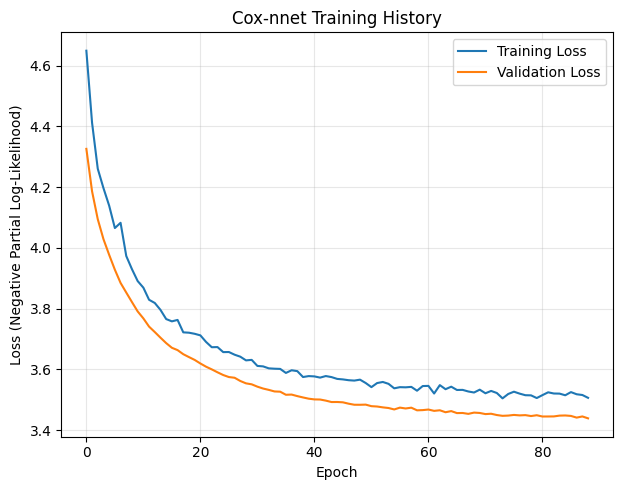

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cox-nnet Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (Negative Partial Log-Likelihood)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Model Evaluation

We'll evaluate the Cox-nnet model using several metrics:

1. **Concordance Index (C-index)**: Measures the model's ability to correctly rank patients by risk. Values range from 0.5 (random) to 1.0 (perfect discrimination).

2. **Brier Score**: Measures calibration (accuracy of predicted probabilities) at specific time points. Lower values indicate better calibration.

3. **Survival Curve Comparison**: Compare predicted survival curves with Kaplan-Meier estimates.

4. **Risk Stratification**: Evaluate how well the model separates patients into different risk groups.


#### Make Prediction

In [ ]:
# Make predictions on test set
# The model outputs log-hazard ratios (risk scores)
risk_scores_train = cox_model.predict(X_train, verbose=0).flatten()
risk_scores_test = cox_model.predict(X_test, verbose=0).flatten()

# Calculate C-index
# Note: Higher risk score = higher hazard = shorter survival
# So we use negative risk scores for concordance_index
c_index_train = concordance_index(t_train, -risk_scores_train, f_train)
c_index_test = concordance_index(t_test, -risk_scores_test, f_test)

print("Model Performance Metrics:")
print("=" * 50)
print(f"Training C-index: {c_index_train:.4f}")
print(f"Test C-index: {c_index_test:.4f}")
print(f"\nInterpretation:")
print(f"A C-index of {c_index_test:.4f} means that in {c_index_test*100:.2f}% of comparable pairs,")
print(f"the model correctly predicts which patient will have the event first.")


Model Performance Metrics:
Training C-index: 0.8359
Test C-index: 0.8383

Interpretation:
A C-index of 0.8383 means that in 83.83% of comparable pairs,
the model correctly predicts which patient will have the event first.


#### Calculate Brier Score at different time points

In [ ]:
# Calculate Brier Score at different time points
# Brier Score = mean((predicted_prob - observed_outcome)^2)

def calculate_brier_score_cox(risk_scores, t_obs, f_obs, time_point):
    """
    Calculate Brier Score at a specific time point for Cox model.

    Note: Cox model doesn't directly predict survival probabilities.
    We need to estimate the baseline hazard and then calculate survival probabilities.
    For simplicity, we'll use a simplified approach based on risk scores.
    """
    # Estimate survival probability at time_point
    # This is a simplified approach - in practice, you'd need to estimate baseline hazard
    # For demonstration, we'll use the risk scores to rank patients
    # and estimate survival based on Kaplan-Meier within risk groups

    # Divide into risk groups
    risk_tertiles = np.percentile(risk_scores, [33.3, 66.7])
    low_risk = risk_scores <= risk_tertiles[0]
    med_risk = (risk_scores > risk_tertiles[0]) & (risk_scores <= risk_tertiles[1])
    high_risk = risk_scores > risk_tertiles[1]

    # Estimate survival probability for each group using Kaplan-Meier
    kmf = KaplanMeierFitter()
    surv_probs = np.zeros(len(risk_scores))

    for mask, label in zip([low_risk, med_risk, high_risk], ['low', 'med', 'high']):
        if mask.sum() > 0:
            kmf.fit(t_obs[mask], event_observed=f_obs[mask])
            surv_at_time = kmf.predict(time_point)
            surv_probs[mask] = surv_at_time

    # Create binary outcome: 1 if event occurred before time_point, 0 otherwise
    y_true = ((t_obs <= time_point) & (f_obs == 1)).astype(float)

    # Only include observations that are not censored before time_point
    mask = (t_obs >= time_point) | (f_obs == 1)

    if mask.sum() == 0:
        return np.nan

    # Calculate Brier Score
    brier_score = np.mean((surv_probs[mask] - (1 - y_true[mask])) ** 2)

    return brier_score

# Calculate Brier Scores at different time points
time_points = {
    '6 months': 180,
    '1 year': 365,
    '2 years': 730,
    '3 years': 1095
}

print("Brier Scores at different time points (Test Set):")
print("-" * 60)
brier_scores = {}

for label, time_point in time_points.items():
    brier_score = calculate_brier_score_cox(risk_scores_test, t_test, f_test, time_point)
    brier_scores[label] = brier_score
    print(f"{label:10s} ({time_point:4.0f} days): {brier_score:.4f}")

print("\nInterpretation: Lower Brier Score indicates better calibration.")
print("Brier Score ranges from 0 (perfect) to 1 (worst).")


Brier Scores at different time points (Test Set):
------------------------------------------------------------
6 months   ( 180 days): 0.1347
1 year     ( 365 days): 0.1526
2 years    ( 730 days): 0.1480
3 years    (1095 days): 0.1259

Interpretation: Lower Brier Score indicates better calibration.
Brier Score ranges from 0 (perfect) to 1 (worst).


#### Visualize Risk Sratification

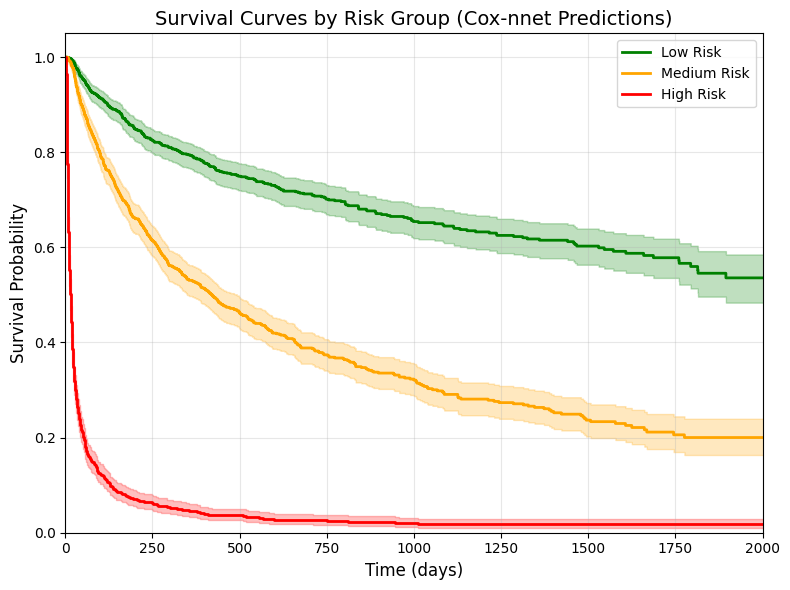


Risk group sizes:
Low risk: 910 patients
Medium risk: 912 patients
High risk: 910 patients


In [ ]:
# Visualize risk stratification
# Divide test set into risk tertiles based on predicted risk scores
risk_tertiles = np.percentile(risk_scores_test, [33.3, 66.7])
low_risk = risk_scores_test <= risk_tertiles[0]
med_risk = (risk_scores_test > risk_tertiles[0]) & (risk_scores_test <= risk_tertiles[1])
high_risk = risk_scores_test > risk_tertiles[1]

plt.figure(figsize=(8, 6))

# Plot Kaplan-Meier curves for each risk group
for risk_group, label, color in zip([low_risk, med_risk, high_risk],
                                    ['Low Risk', 'Medium Risk', 'High Risk'],
                                    ['green', 'orange', 'red']):
    kmf_group = KaplanMeierFitter()
    kmf_group.fit(t_test[risk_group], event_observed=f_test[risk_group], label=f'{label}')
    kmf_group.plot_survival_function(ax=plt.gca(), color=color, linewidth=2)

plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.title('Survival Curves by Risk Group (Cox-nnet Predictions)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, min(2000, t_test.max() * 1.1))
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

print(f"\nRisk group sizes:")
print(f"Low risk: {low_risk.sum()} patients")
print(f"Medium risk: {med_risk.sum()} patients")
print(f"High risk: {high_risk.sum()} patients")


### Feature Evaluation

Feature evaluation in Cox-nnet is more challenging than in linear models because the neural network learns complex, non-linear transformations. However, we can still gain insights into feature importance through several approaches:

1. **Weight Analysis**: Examine the weights in the first layer of the network
2. **Permutation Importance**: Measure how much performance decreases when a feature is shuffled
3. **Risk Score Analysis**: Analyze how features correlate with predicted risk scores

**Note**: Unlike linear Cox models, Cox-nnet doesn't provide direct coefficient estimates, making interpretation more complex.


Feature Importance (based on first layer weights):
 Feature  Importance
hospdead    6.056242
    slos    4.551727
  surv6m    2.711885
     sps    1.746299
 charges    1.193281
    hday    1.014385
  totcst    0.977216
  surv2m    0.815137
   scoma    0.800220
  num.co    0.677737
 avtisst    0.657457
 totmcst    0.593951
     aps    0.517349
     age    0.449409
     edu    0.314456


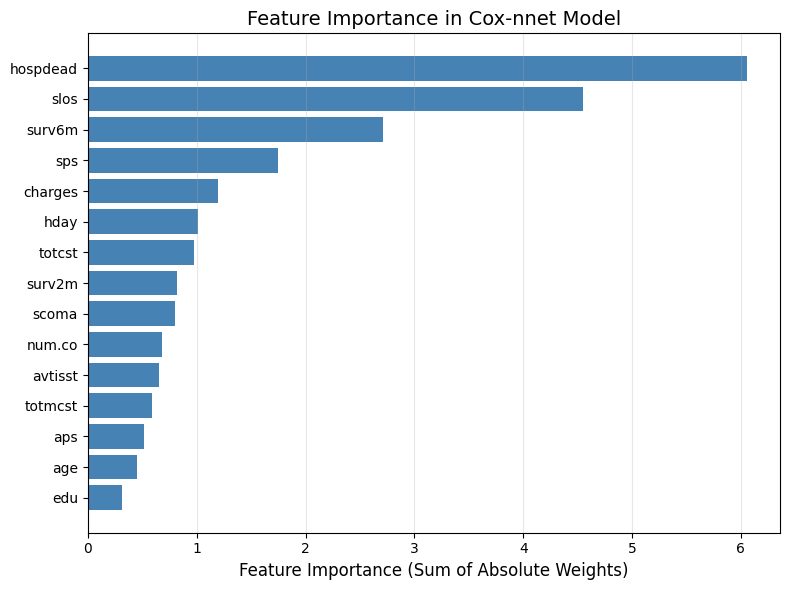

In [ ]:
# Extract weights from the first (hidden) layer
hidden_layer_weights = cox_model.layers[0].get_weights()[0]  # Shape: (n_features, n_hidden)

# Calculate feature importance as the sum of absolute weights
# This gives a rough measure of how much each feature contributes to the hidden layer
feature_importance = np.abs(hidden_layer_weights).sum(axis=1)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (based on first layer weights):")
print("=" * 60)
print(feature_importance_df.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], color='steelblue')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance (Sum of Absolute Weights)', fontsize=12)
plt.title('Feature Importance in Cox-nnet Model', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


### Permutaion Based Feature Importance

In [ ]:
# Permutation Importance
# This measures how much the C-index decreases when a feature is randomly shuffled

def calculate_permutation_importance(model, X, t, f, feature_idx, n_iterations=5):
    """
    Calculate permutation importance for a feature.
    """
    # Calculate baseline C-index
    baseline_risk = model.predict(X, verbose=0).flatten()
    baseline_c_index = concordance_index(t, -baseline_risk, f)

    # Shuffle feature and calculate C-index
    permuted_c_indices = []
    X_permuted = X.copy()

    for _ in range(n_iterations):
        np.random.shuffle(X_permuted[:, feature_idx])
        permuted_risk = model.predict(X_permuted, verbose=0).flatten()
        permuted_c_index = concordance_index(t, -permuted_risk, f)
        permuted_c_indices.append(permuted_c_index)
        # Reset for next iteration
        X_permuted[:, feature_idx] = X[:, feature_idx]

    # Importance = decrease in C-index
    importance = baseline_c_index - np.mean(permuted_c_indices)

    return importance

# Calculate permutation importance for top features (this can be slow)
print("Calculating Permutation Importance (this may take a few minutes)...")
print("=" * 60)

# Calculate for a subset of features to save time
n_features_to_test = min(10, len(feature_cols))
top_features_idx = feature_importance_df.head(n_features_to_test).index

perm_importance = []
for idx in top_features_idx:
    importance = calculate_permutation_importance(cox_model, X_test, t_test, f_test, idx, n_iterations=3)
    perm_importance.append(importance)
    print(f"{feature_cols[idx]:20s}: {importance:.4f}")

# Add permutation importance to dataframe
feature_importance_df.loc[top_features_idx, 'Permutation_Importance'] = perm_importance

print("\nTop features by Permutation Importance:")
print(feature_importance_df[['Feature', 'Permutation_Importance']].dropna().sort_values(
    by='Permutation_Importance', ascending=False).to_string(index=False))


Calculating Permutation Importance (this may take a few minutes)...
hospdead            : 0.2150
slos                : 0.0255
surv6m              : 0.0825
sps                 : 0.0183
charges             : 0.0018
hday                : 0.0019
totcst              : 0.0026
surv2m              : 0.0029
scoma               : 0.0036
num.co              : 0.0073

Top features by Permutation Importance:
 Feature  Permutation_Importance
hospdead                0.215041
  surv6m                0.082469
    slos                0.025478
     sps                0.018335
  num.co                0.007331
   scoma                0.003559
  surv2m                0.002869
  totcst                0.002604
    hday                0.001949
 charges                0.001834


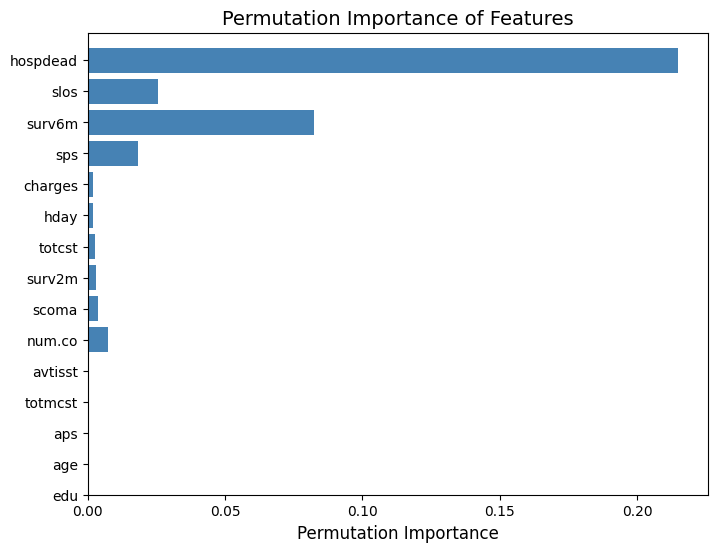

In [ ]:
# Plot permutation importance
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Permutation_Importance'], color='steelblue')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Permutation Importance', fontsize=12)
plt.title('Permutation Importance of Features', fontsize=14)
plt.gca().invert_yaxis()

## Summary and Conclusion

Cox-nnet enhances the traditional Cox proportional hazards model by substituting the linear predictor with a neural network, enabling the capture of complex, non-linear relationships between covariates and survival outcomes while preserving the proportional hazards framework. This makes it especially effective for high-dimensional data such as gene expression profiles, where conventional Cox models often face challenges with feature selection and overfitting. Unlike alternative neural network–based survival models like DeepHit or Nnet-Survival, Cox-nnet adheres to the proportional hazards assumption, which supports interpretability within the well-established Cox modeling context. Model performance is typically assessed using both the concordance index (C-index), which evaluates the model’s ability to discriminate risk rankings among individuals, and the Brier score, which measures the calibration or accuracy of predicted survival probabilities—both critical for comprehensive survival model evaluation. However, because Cox-nnet does not yield direct regression coefficients like its linear counterpart, assessing feature importance requires alternative strategies such as neural network weight inspection, permutation importance, or other post-hoc interpretability techniques. Alternative models should be considered when key assumptions or requirements differ: for instance, DeepHit or Nnet-Survival may be preferable if the proportional hazards assumption is violated, if competing risks are present, or if discrete-time survival predictions are needed; traditional Cox regression remains the choice for maximum interpretability, while simpler models are advisable in cases of very limited sample sizes. Looking ahead, promising directions for Cox-nnet include integrating attention mechanisms to improve feature interpretability, extending the framework to accommodate time-varying covariates, developing dedicated tools for interpreting neural network–derived feature contributions, refining methods for baseline hazard estimation and full survival curve prediction, and tailoring regularization approaches specifically for survival analysis contexts.



## Resources

### Research Papers

1. **Ching, T., Zhu, X., & Garmire, L. X. (2018)**. Cox-nnet: An artificial neural network method for prognosis prediction of high-throughput omics data. *PLoS computational biology*, 14(4), e1006076.
   - URL: https://pmc.ncbi.nlm.nih.gov/articles/PMC5909924/
   - DOI: 10.1371/journal.pcbi.1006076
   - **Original Cox-nnet paper**

2. **Ching, T., Himmelstein, D. S., Beaulieu-Jones, B. K., Kalinin, A. A., Do, B. T., Way, G. P., ... & Garmire, L. X. (2018)**. Opportunities and obstacles for deep learning in biology and medicine. *Journal of the Royal Society Interface*, 15(141), 20170387.
   - Discusses broader applications of deep learning in biomedicine

3. **Katzman, J. L., Shaham, U., Cloninger, A., Bates, J., Jiang, T., & Kluger, Y. (2018)**. DeepSurv: personalized treatment recommender system using a Cox proportional hazards deep neural network. *BMC medical research methodology*, 18(1), 1-12.
   - Related work on DeepSurv for comparison

4. **Lee, C., Zame, W., Yoon, J., & van der Schaar, M. (2018)**. DeepHit: A deep learning approach to survival analysis with competing risks. *Proceedings of the AAAI Conference on Artificial Intelligence*, 32(1).
   - Related work on DeepHit for comparison

5. **Gensheimer, M. F., & Narasimhan, B. (2019)**. A scalable discrete-time survival model for neural networks. *PeerJ*, 7, e6257.
   - Related work on Nnet-Survival for comparison

### Software and Code

1. **Cox-nnet GitHub Repository**
   - URL: https://github.com/lanagarmire/cox-nnet
   - Contains: Original R implementation, documentation, and examples
   - Note: Original implementation is in R, but concepts translate to Python

2. **SUPPORT Dataset**
   - Available in the nnet-survival repository: https://github.com/MGensheimer/nnet-survival/tree/master/data
   - Original study: Knaus, W. A., et al. (1995). The SUPPORT prognostic model: Objective estimates of survival for seriously ill hospitalized adults. *Annals of Internal Medicine*, 122(3), 191-203.
   - Dataset description: https://hbiostat.org/data/repo/supportdesc.html

### Related Tools and Libraries

1. **Lifelines** - Survival analysis in Python
   - URL: https://github.com/CamDavidsonPilon/lifelines
   - Useful for: Kaplan-Meier estimation, Cox models, and survival analysis utilities

2. **TensorFlow/Keras** - Deep learning framework
   - URL: https://www.tensorflow.org/
   - Used for: Neural network implementation

3. **scikit-survival** - Survival analysis with scikit-learn
   - URL: https://github.com/sebp/scikit-survival
   - Useful for: Additional survival analysis methods

4. **PyCox** - Deep learning for survival analysis
   - URL: https://github.com/havakv/pycox
   - Contains: Implementations of DeepSurv, DeepHit, and other neural survival models

### Additional Reading

1. **Survival Analysis Fundamentals**
   - Klein, J. P., & Moeschberger, M. L. (2003). *Survival Analysis: Techniques for Censored and Truncated Data* (2nd ed.). Springer.
   - Cox, D. R. (1972). Regression models and life-tables. *Journal of the Royal Statistical Society: Series B*, 34(2), 187-202.

2. **Neural Networks for Survival Analysis**
   - Various recent papers on neural networks for survival analysis
   - DeepSurv: https://github.com/jaredleekatzman/DeepSurv

### Tutorials and Documentation

1. **Cox-nnet Documentation**: Check the README and examples in the GitHub repository
2. **TensorFlow Tutorials**: https://www.tensorflow.org/tutorials
3. **Lifelines Documentation**: https://lifelines.readthedocs.io/
4. **scikit-survival Documentation**: https://scikit-survival.readthedocs.io/

### Online Resources

1. **Vanderbilt Biostatistics Wiki**: https://hbiostat.org/
   - Contains many survival analysis datasets and resources

2. **Survival Analysis in Python**: Various online tutorials and courses
   - Search for "survival analysis python tutorial" for additional resources
